In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

In [2]:
# Charger les données
data = pd.read_json("D:/Stage_ALMATech/assurance.json")

In [3]:
# Convertir la colonne 'date' en format datetime
data['date'] = pd.to_datetime(data['date'])

# Extraire le mois et l'année à partir de la colonne 'date'
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for varianc

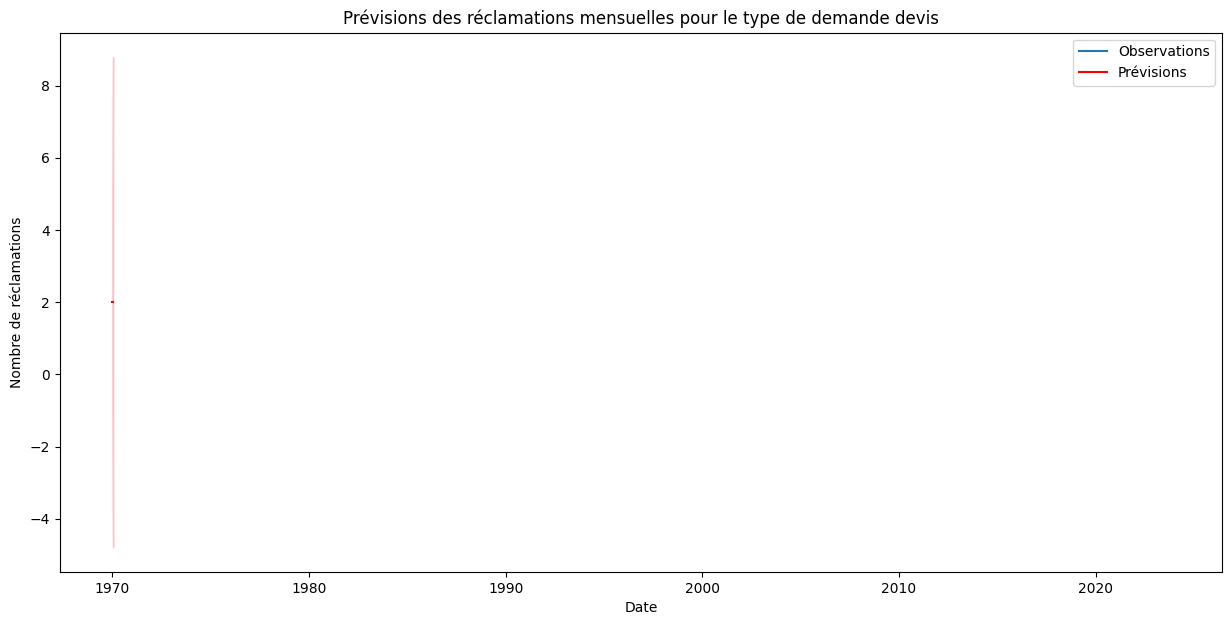

C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


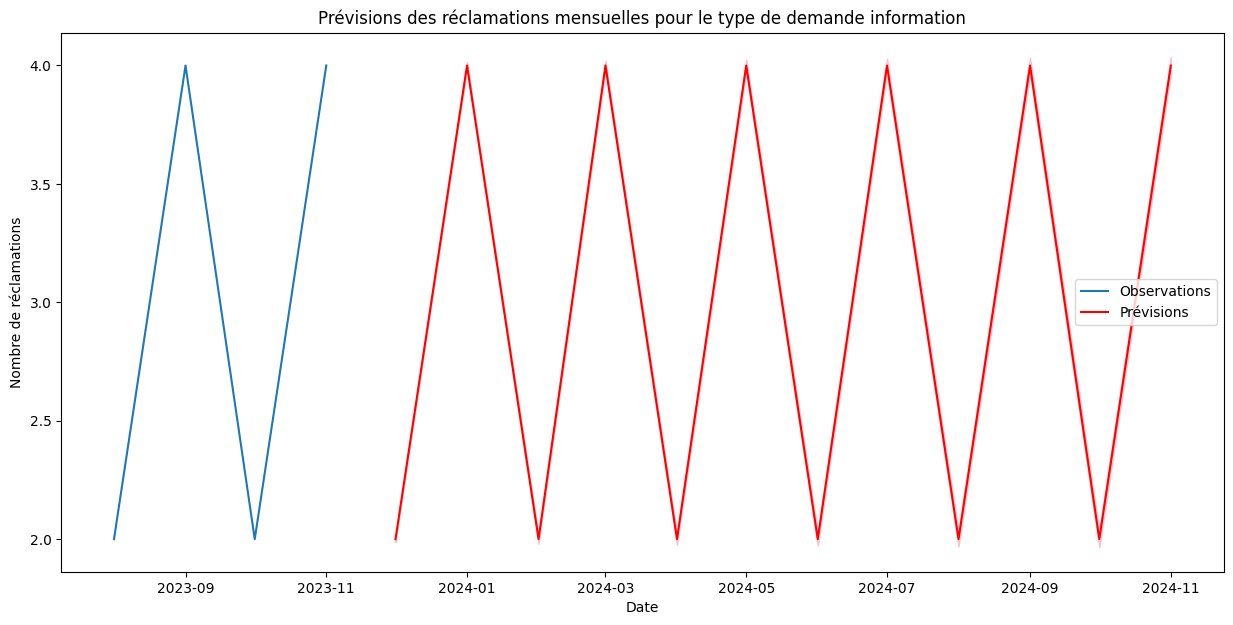

C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for ARMA and trend. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


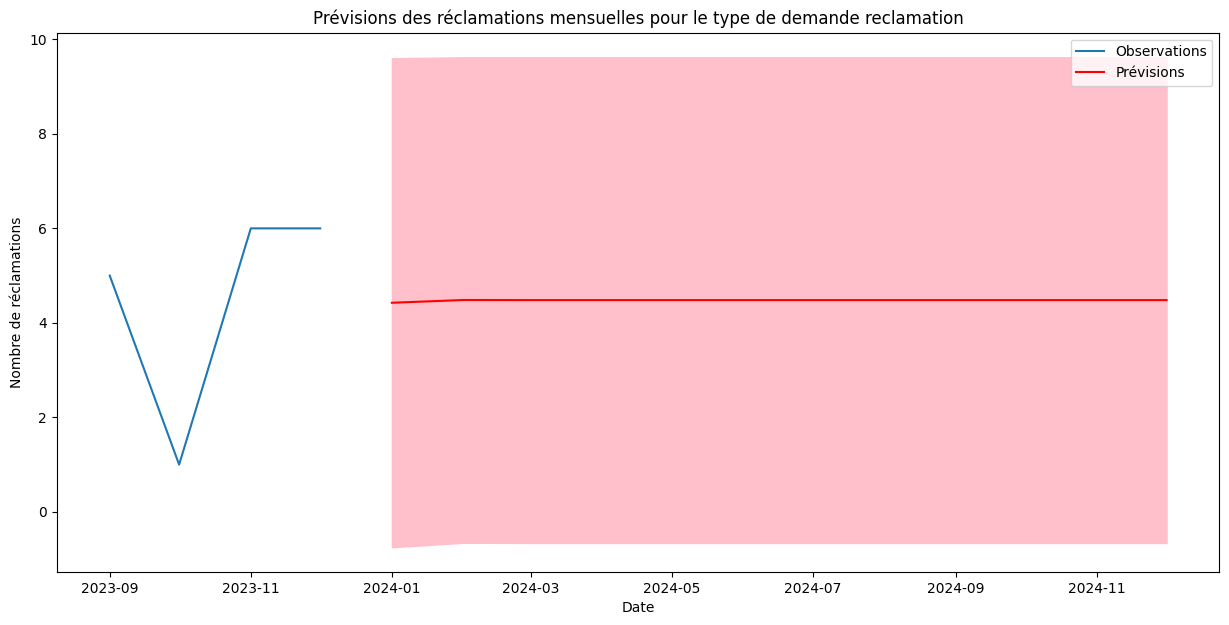

C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\User\.conda\envs\Hadhemy\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


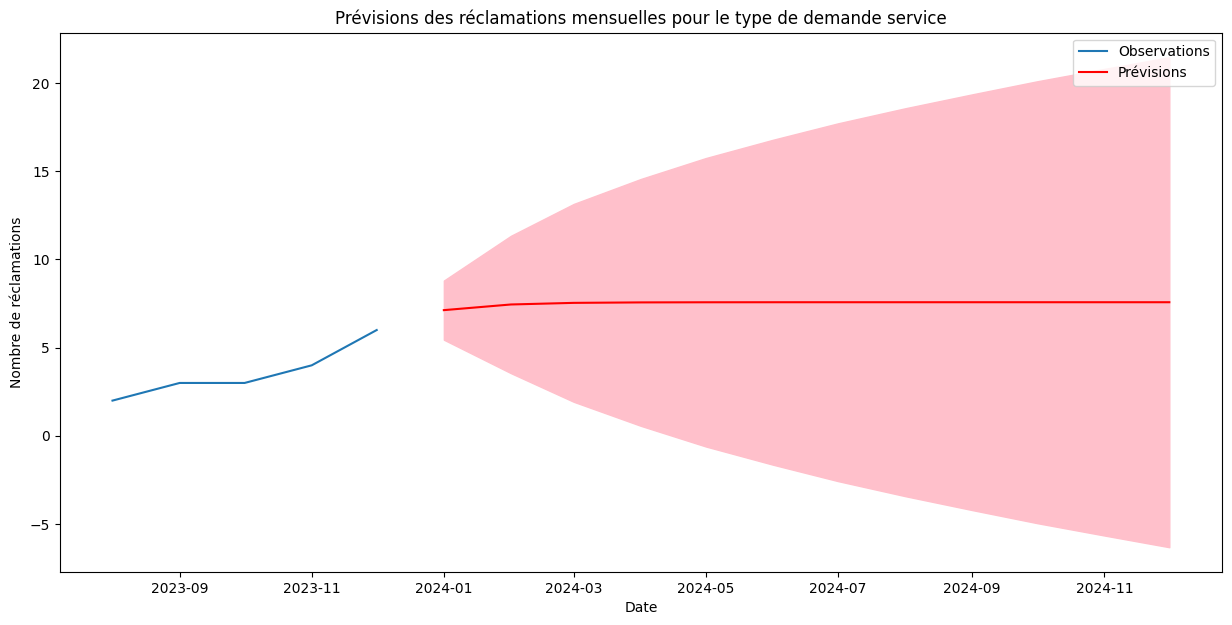

In [4]:


# Regrouper les réclamations par mois, type_demande et compter le nombre de réclamations
monthly_claims_by_type = data.groupby(['year', 'month', 'type_demande']).size().reset_index(name='claims_count')

# Utiliser ARIMA pour ajuster un modèle à chaque série temporelle de réclamations
for type_demande, group in monthly_claims_by_type.groupby('type_demande'):
    # Créer une série temporelle à partir du nombre de réclamations
    ts = pd.Series(group['claims_count'].values, index=pd.to_datetime(group[['year', 'month']].assign(day=1)))

    # Ajuster le modèle ARIMA
    model = ARIMA(ts, order=(1, 1, 1))  # Vous pouvez ajuster l'ordre de l'ARIMA selon vos besoins
    arima_result = model.fit()

    # Faire des prédictions pour les 12 prochains mois
    predictions = arima_result.forecast(steps=12)
    predicted_means = predictions
    predicted_intervals = arima_result.get_forecast(steps=12).conf_int()

    # Tracer les résultats
    plt.figure(figsize=(15, 7))
    plt.plot(ts.index, ts, label='Observations')
    plt.plot(predictions.index, predicted_means, color='r', label='Prévisions')
    plt.fill_between(predicted_intervals.index, predicted_intervals.iloc[:, 0], predicted_intervals.iloc[:, 1], color='pink')
    plt.legend()
    plt.title(f'Prévisions des réclamations mensuelles pour le type de demande {type_demande}')
    plt.xlabel('Date')
    plt.ylabel('Nombre de réclamations')
    plt.show()
    
 
